In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/abhinayyarlagadda/PycharmProjects/PConsulting/TCPD_GE_all_2021-6-27.csv")

/Users/abhinayyarlagadda/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
data.shape

(91427, 42)

In [31]:
data = data[data['Year'].isin([1967, 1971, 1977, 1980, 1984, 1989, 1991, 
                               1996, 1998, 1999, 2004, 2009, 2014, 2019])]
cols = ['Election_Type', 'month', 'Poll_No', 'DelimID', 'Age', 'District_Name']
data = data.drop(cols,axis=1)

In [32]:
data.shape

(86929, 36)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86929 entries, 0 to 91426
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_Name              86929 non-null  object 
 1   Assembly_No             86929 non-null  int64  
 2   Constituency_No         86929 non-null  int64  
 3   Year                    86929 non-null  int64  
 4   Position                86929 non-null  int64  
 5   Candidate               86929 non-null  object 
 6   Sex                     86148 non-null  object 
 7   Party                   86929 non-null  object 
 8   Votes                   86929 non-null  float64
 9   Candidate_Type          29593 non-null  object 
 10  Valid_Votes             86929 non-null  float64
 11  Electors                86922 non-null  float64
 12  Constituency_Name       86929 non-null  object 
 13  Constituency_Type       86929 non-null  object 
 14  Sub_Region              5850 non-null 

In [34]:
lowt = data[(data['Turnout_Percentage']<40)& (data['State_Name']!='Jammu_&_Kashmir')&(data['Position']==1)]
cl = lowt.Year.value_counts()
cl[2014] = 0
cl[2019] = 0

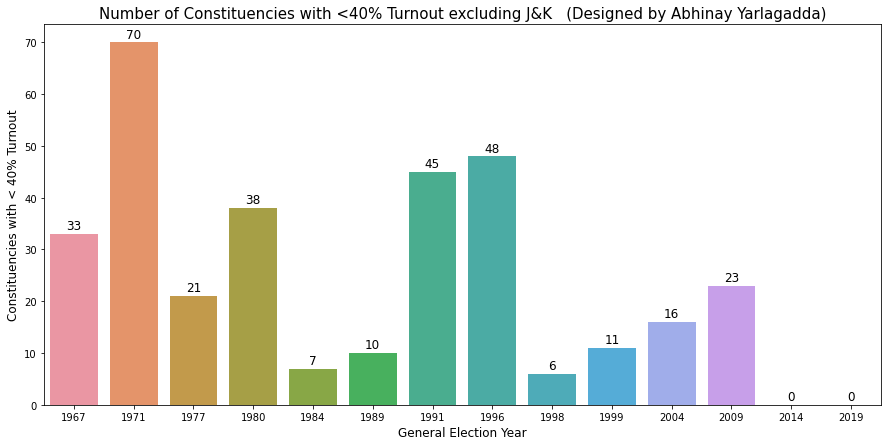

In [35]:
save = plt.figure(figsize = (15, 7))
plot = sns.barplot(x=cl.index, y=cl.values)

plt.xlabel("General Election Year", size=12)
plt.ylabel("Constituencies with < 40% Turnout", size=12)
plt.title("Number of Constituencies with <40% Turnout excluding J&K   (Designed by Abhinay Yarlagadda)", size =15)

for bar in plot.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plot.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
save.savefig("Constituencies<40%")

In [36]:
#countlow
#bjp1960.State_Name.value_counts()

In [37]:
bjp1460 = pd.DataFrame(data[(data['Vote_Share_Percentage']>=60)& (data['Year']==2014) & (data['Party']=='BJP')])
bjp1960 = pd.DataFrame(data[(data['Vote_Share_Percentage']>=60)& (data['Year']==2019) & (data['Party']=='BJP')])
gs = pd.DataFrame(bjp1960.State_Name.value_counts())
ls = { 'Andhra_Pradesh': 25, 'Arunachal_Pradesh': 2, 'Assam':14, 'Bihar': 40, 'Chhattisgarh':11, 'Goa':2,
      'Gujarat': 26, 'Haryana': 10, 'Himachal_Pradesh': 4, 'Jharkhand':14, 'Karnataka': 28, 'Kerala': 20,
      'Madhya_Pradesh': 29, 'Maharashtra': 48, 'Manipur': 2, 'Meghalaya': 2, 'Mizoram': 1, 'Nagaland': 1,
      'Odisha': 21, 'Punjab': 13, 'Rajasthan': 25, 'Sikkim': 1, 'Tamil_Nadu': 39, 'Telangana': 17,
      'Tripura': 2, 'Uttar_Pradesh': 80, 'Uttarakhand': 5, 'West_Bengal': 42, 'Delhi': 7, 'Jammu_&_Kashmir': 5
     }


In [38]:
gs['Total'] = gs.index.map(ls)
gs= gs.rename(columns = {'State_Name': 'Number'})
gs['SR'] = (gs['Number'] / gs['Total'] *100).apply(np.ceil)



In [39]:

#gs = gs[gs['Number']>4]
gs

,Number,Total,SR
Gujarat,15,26,58.0
Madhya_Pradesh,14,29,49.0
Rajasthan,12,25,48.0
Uttar_Pradesh,6,80,8.0
Bihar,5,40,13.0
Uttarakhand,4,5,80.0
Haryana,4,10,40.0
Himachal_Pradesh,4,4,100.0
Jharkhand,4,14,29.0
Karnataka,4,28,15.0


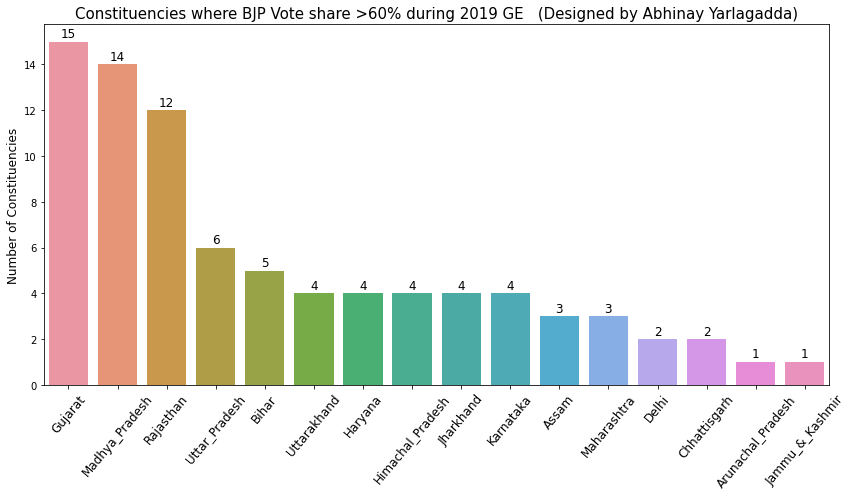

In [40]:
save = plt.figure(figsize = (12, 7))
plot = sns.barplot(data= gs, x =gs.index, y= gs.Number)

plt.xticks(rotation =50, size =12)
plt.ylabel("Number of Constituencies", size=12)
plt.title("Constituencies where BJP Vote share >60% during 2019 GE   (Designed by Abhinay Yarlagadda)", size =15)
plt.tight_layout()

for bar in plot.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plot.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
save.savefig("BJP>60%")

In [41]:
bjp1960.State_Name[0:10].map(ls)

5948      2
7298     14
7407     14
7416     14
16426    40
16466    40
16592    40
16601    40
16868    40
18020    11
Name: State_Name, dtype: int64

In [42]:
bjp1960.State_Name.value_counts()

Gujarat              15
Madhya_Pradesh       14
Rajasthan            12
Uttar_Pradesh         6
Bihar                 5
Uttarakhand           4
Haryana               4
Himachal_Pradesh      4
Jharkhand             4
Karnataka             4
Assam                 3
Maharashtra           3
Delhi                 2
Chhattisgarh          2
Arunachal_Pradesh     1
Jammu_&_Kashmir       1
Name: State_Name, dtype: int64

In [71]:
checky = [1984, 1989, 1991, 1996, 1998, 
          1999, 2004, 2009, 2014, 2019]
splt = data[(data['Position']==1)&(data['Year'].isin(checky))& (data['Party'].isin(['INC', 'INC(I)','BJP']))]
splt = splt[['Year','Party','Vote_Share_Percentage','Margin_Percentage']]
splt = splt.reset_index().drop(columns =['index'], axis=1)

splt.Vote_Share_Percentage.min()

18.63

<AxesSubplot:xlabel='Year', ylabel='Vote_Share_Percentage'>

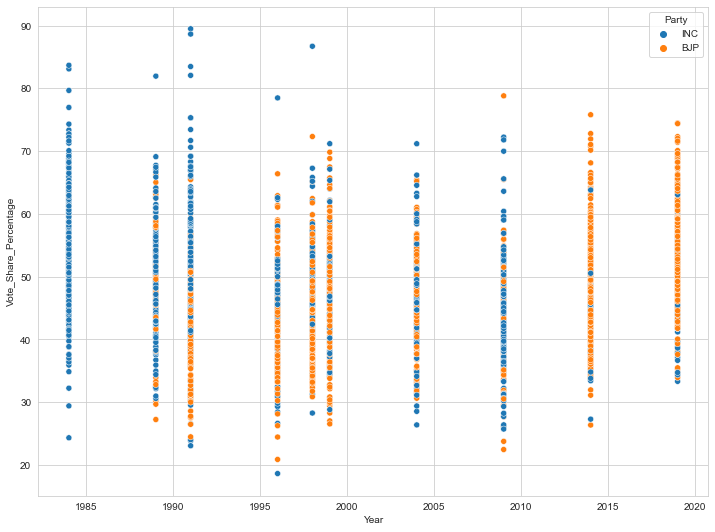

In [72]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=splt, x=splt.Year, y=splt.Vote_Share_Percentage, hue=splt.Party)

<AxesSubplot:xlabel='Vote_Share_Percentage', ylabel='Margin_Percentage'>

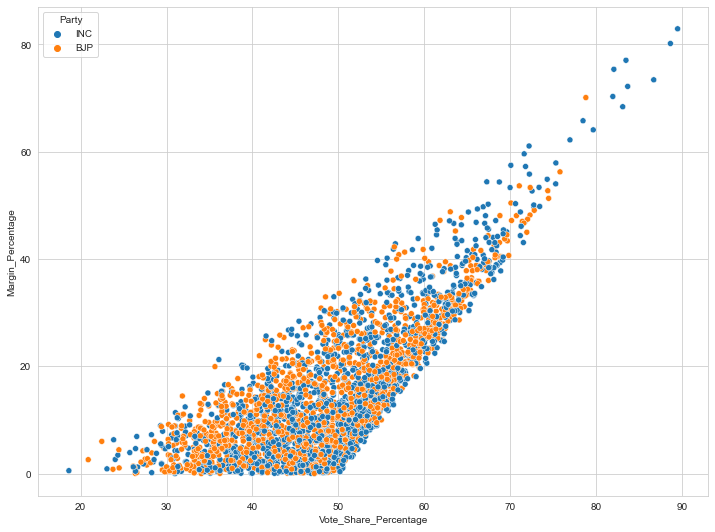

In [89]:
plt.figure(figsize=(12,9))
#splt = splt[splt['Year'].isin([2019])]
sns.scatterplot(data=splt, y=splt.Margin_Percentage, x=splt.Vote_Share_Percentage, hue=splt.Party)

Text(0.5, 1.0, 'Frequency Distribution of Margin Percentages in General Elections starting 1984')

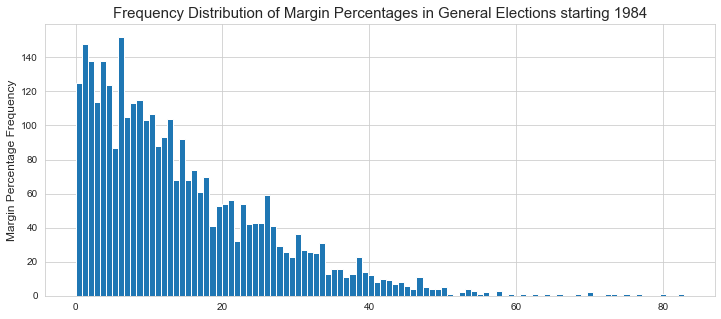

In [87]:
plt.figure(figsize=(12,5))
splt['Margin_Percentage'].plot.hist(bins=100)
plt.ylabel("Margin Percentage Frequency", size =12)
plt.title("Frequency DistruMargin Percentages in General Elections starting 1984", size=15)

<AxesSubplot:ylabel='Frequency'>

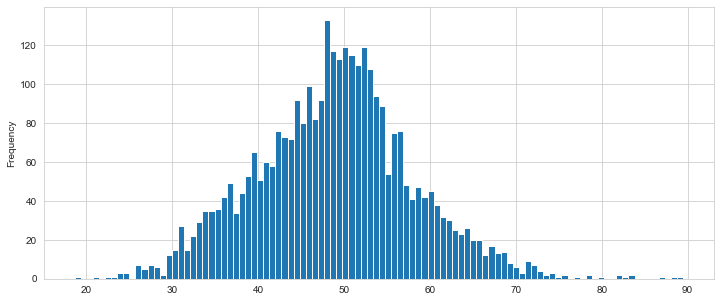

In [81]:
plt.figure(figsize=(12,5))
splt['Vote_Share_Percentage'].plot.hist(bins=100)

In [47]:
# Women vs Women Contestants

femdata= data[(data['Sex']=='F')&(data['Party'].isin(['INC','INC(I)','BJP']))]
checkdata = femdata
checkdata = checkdata.sort_values('Assembly_No')
wvw = []
state = []
year = []
checky = [1984, 1989, 1991, 1996, 1998, 
          1999, 2004, 2009, 2014, 2019]
for i in checky:
    kdata = checkdata[checkdata['Year']==i]
    sname = kdata.State_Name.unique()
    for j in sname:
        ndata = kdata[kdata['State_Name']==j]
        cno = ndata['Constituency_No'].unique()
        for k in cno:
            if(ndata[ndata['Constituency_No']==k].shape[0]>1):
                wvw.append(k)
                state.append(j)
                year.append(i)
            
newdf = { "Year": year, "State_Name" : state, "Constituency_No": wvw 

        }            
dfdata = pd.DataFrame(newdf)
s= dfdata.Year.value_counts()

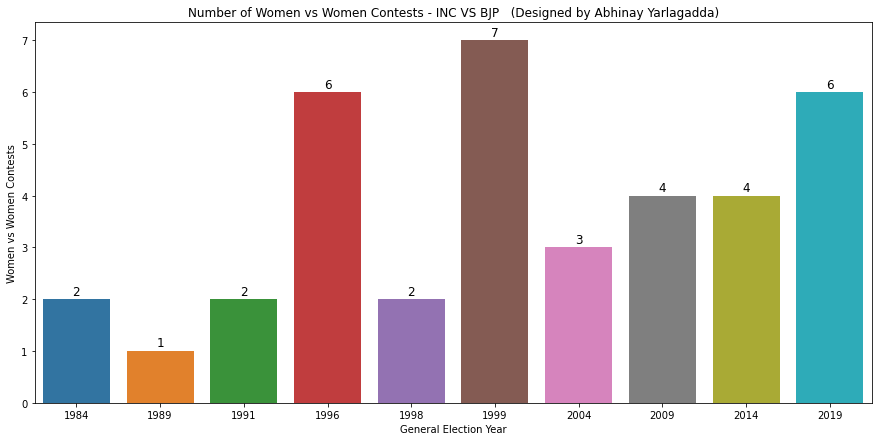

In [48]:
plt.figure(figsize = (15, 7))
plot = sns.barplot(x=s.index, y=s.values)

plt.xlabel("General Election Year")
plt.ylabel("Women vs Women Contests")
plt.title("Number of Women vs Women Contests - INC VS BJP   (Designed by Abhinay Yarlagadda)")

for bar in plot.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plot.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

In [49]:
winners = data.loc[data['Position']==1]
runners = data.loc[data['Position']==2]
bjptot = data.loc[data['Party']=='BJP']
congtot = data.loc[data['Party'].isin(['INC','INC(I)'])]
otot = data.loc[(data['Party'] !='INC') & (data['Party'] !='BJP') & (data['Party'] !='INC(I)')]
bjpwins = data.loc[(data['Position']==1) & (data['Party']=='BJP')]
congwins = data.loc[(data['Position']==1) & (data['Party'].isin(['INC','INC(I)']))]
others = data.loc[(data['Position']==1) & ((data['Party'] !='INC') & (data['Party'] !='BJP') 
                                           & (data['Party'] !='INC(I)'))]
# leftwins = data.loc[(data['Position']==1) & (data['Party'].isin[('CPM', 'CPI')])]

In [138]:
data

,State_Name,Assembly_No,Constituency_No,Year,Position,Candidate,Sex,Party,Votes,Candidate_Type,...,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest
0,Andaman_&_Nicobar_Islands,4,1,1967,1,K. R. GANESH,M,INC,19310.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,False,False
1,Andaman_&_Nicobar_Islands,4,1,1967,2,P. K. S. PRASAD,M,IND,9270.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False
2,Andaman_&_Nicobar_Islands,4,1,1967,3,KANDASWAMY,M,DMK,4891.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False
3,Andaman_&_Nicobar_Islands,4,1,1967,4,R. L. SAHA,M,SWA,1717.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False
4,Andaman_&_Nicobar_Islands,4,1,1967,5,R. C. MAZUMDAR,M,IND,1391.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91422,West_Bengal,17,42,2019,6,NOTA,NaN,NOTA,12318.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False
91423,West_Bengal,17,42,2019,7,PRABIR MUKHOPADHYAY,M,BSP,9467.0,GEN,...,2.0,BSP,16651.0,BIRBHUM,True,NaN,0.0,NaN,False,True
91424,West_Bengal,17,42,2019,8,MD. FIROJ ALI,M,BNJD,9400.0,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False
91425,West_Bengal,17,42,2019,9,AYESHA KHATUN,F,SUCI(C),6000.0,GEN,...,2.0,SUCI,8082.0,BIRBHUM,True,NaN,0.0,NaN,False,True


In [163]:
#Generic Function
# def ge(party, position, )

#destroy = congwins.groupby(['Year']).size()


#destroy = pd.DataFrame(winners.groupby(['Year', 'State_Name']).size())
#destroy.loc[2019]
check = data[(data['Year']==2019)&(data['Position'].isin([1,2]))]

#check.groupby(['State_Name','Party']).size().sort_values()
#check.groupby(['State_Name','Party']).Margin_Percentage.unique()
check = check[(check['State_Name']=='Andhra_Pradesh')&(check['Constituency_No']==2)]
check


,State_Name,Assembly_No,Constituency_No,Year,Position,Candidate,Sex,Party,Votes,Candidate_Type,...,Contested,Last_Party,Last_Party_ID,Last_Constituency_Name,Same_Constituency,Same_Party,No_Terms,Turncoat,Incumbent,Recontest
5524,Andhra_Pradesh,17,2,2019,1,KINJARAPU RAM MOHAN NAIDU,M,TDP,534544.0,GEN,...,4.0,TRS,8284.0,PEDDAPALLE,False,NaN,2.0,NaN,True,True
5525,Andhra_Pradesh,17,2,2019,2,DUVVADA SRINIVAS,M,YSRCP,527891.0,GEN,...,1.0,NaN,NaN,NaN,NaN,NaN,0.0,False,False,False


In [155]:
check = data[data['Position'].isin(1,2)]

TypeError: isin() takes 2 positional arguments but 3 were given

In [50]:
# BJP Code 

bwins = [] # Total Wins for BJP GE wise
year = [] # Election years in which BJP Contested
bftot = [] # Number of tickets given to Women by BJP
bfwins = [] # Number of Women MPs in LS for BJP
tcinb = [] # Number of Turncoats in BJP
tcinbwins = [] # Number of Turncoats Won from BJP
checky = [1984, 1989, 1991, 
          1996, 1998, 1999, 2004, 2009, 2014, 2019]


for i in checky:
    bwins.append(bjpwins[bjpwins['Year']==i].shape[0])
    bftot.append(bjptot[(bjptot['Year']==i) & (bjptot['Sex']=='F')].shape[0])
    bfwins.append(bjpwins[(bjpwins['Year']==i) & (bjpwins['Sex']=='F')].shape[0])
    tcinb.append(bjptot[(bjptot['Year']==i) & (bjptot['Turncoat']==True)].shape[0])
    tcinbwins.append(bjpwins[(bjpwins['Year']==i) & (bjpwins['Turncoat']==True)].shape[0])
    
    
        
datab = {"Wins": bwins, "Year": checky, "FContested": bftot, "FWon": bfwins, 
         "TurnCoat": tcinb, "TurnCoatWins": tcinbwins
        }
bdata = pd.DataFrame(datab)    
bdata = bdata.sort_values('Year')
bdata['Party'] = 'BJP'
bdata['FSrate']= (bdata['FWon'] / bdata['FContested'] *100).apply(np.ceil)
bdata['TCSrate']= (bdata['TurnCoatWins'] / bdata['TurnCoat'] *100).apply(np.ceil)

In [51]:
# INC Code

cwins = []
year = []
cftot = []
cfwins = []
tcinc = []
tcincwins = []
checky = [1971, 1977, 1980, 1984, 1989, 1991, 
          1996, 1998, 1999, 2004, 2009, 2014, 2019]

for i in checky:
    cwins.append(congwins[congwins['Year']==i].shape[0])
    cftot.append(congtot[(congtot['Year']==i) & (congtot['Sex']=='F')].shape[0])
    cfwins.append(congwins[(congwins['Year']==i) & (congwins['Sex']=='F')].shape[0])
    tcinc.append(congtot[(congtot['Year']==i) & (congtot['Turncoat']==True)].shape[0])
    tcincwins.append(congwins[(congwins['Year']==i) & (congwins['Turncoat']==True)].shape[0])
    
    
        
datac = {"Wins": cwins, "Year": checky, "FContested": cftot, "FWon": cfwins,
         "TurnCoat": tcinc, "TurnCoatWins": tcincwins
        }
cdata = pd.DataFrame(datac)    
cdata = cdata.sort_values('Year')
cdata['Party'] = 'INC'
cdata['FSrate']= (cdata['FWon'] / cdata['FContested'] *100).apply(np.ceil)
cdata['TCSrate']= (cdata['TurnCoatWins'] / cdata['TurnCoat'] *100).apply(np.ceil)
cdata = cdata.fillna(0)

In [52]:
# Others Code

owins = []
year = []
oftot = []
ofwins = []
checky = [1971, 1977, 1980, 1984, 1989, 1991, 
          1996, 1998, 1999, 2004, 2009, 2014, 2019]

for i in checky:
    owins.append(others[others['Year']==i].shape[0])
    oftot.append(otot[(otot['Year']==i) & (otot['Sex']=='F')].shape[0])
    ofwins.append(others[(others['Year']==i) & (others['Sex']=='F')].shape[0])
    
        
datao = {"Wins": owins, "Year": checky, "FContested": oftot, "FWon": ofwins}
odata = pd.DataFrame(datao)    
odata = odata.sort_values('Year')
odata['Party'] = 'Others'
odata['FSrate']= (odata['FWon'] / odata['FContested'] *100).apply(np.ceil)

In [53]:
# Concat the frames of BJP, INC & Others

frames = [bdata, cdata, odata]
fdata = pd.concat(frames)

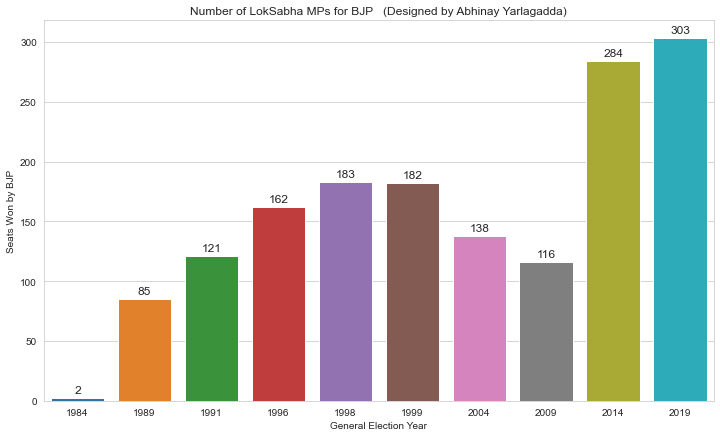

In [54]:
save = plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
plots1 = sns.barplot(data= bdata, x="Year", y="Wins")
for bar in plots1.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots1.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("General Election Year")
plt.ylabel("Seats Won by BJP")
plt.title("Number of LokSabha MPs for BJP   (Designed by Abhinay Yarlagadda)")
save.savefig("BJP LS MPs")

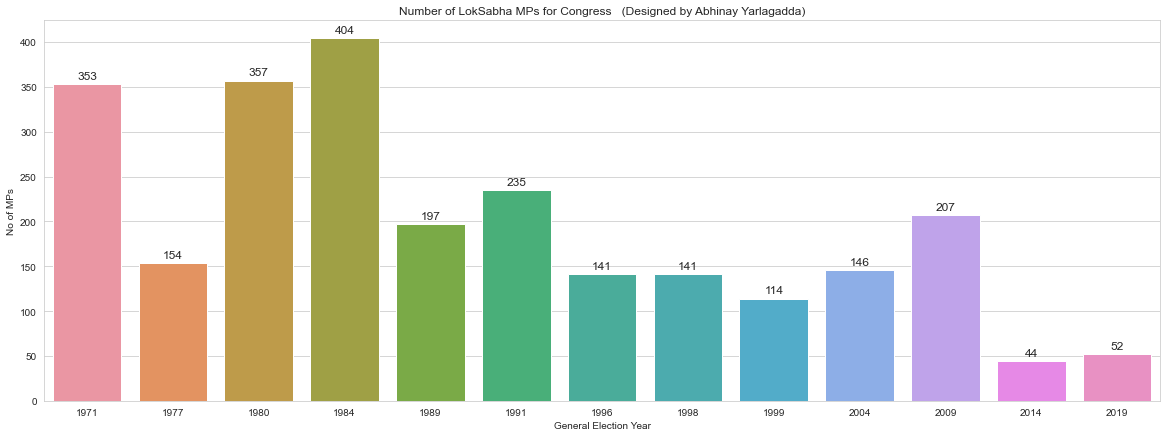

In [55]:
save = plt.figure(figsize=(20, 7))
sns.set_style("whitegrid")
plots2 = sns.barplot(data= cdata, x="Year", y="Wins")

for bar in plots2.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots2.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("General Election Year")
plt.ylabel("No of MPs")
plt.title("Number of LokSabha MPs for Congress   (Designed by Abhinay Yarlagadda)")
save.savefig("INC LS MPs")

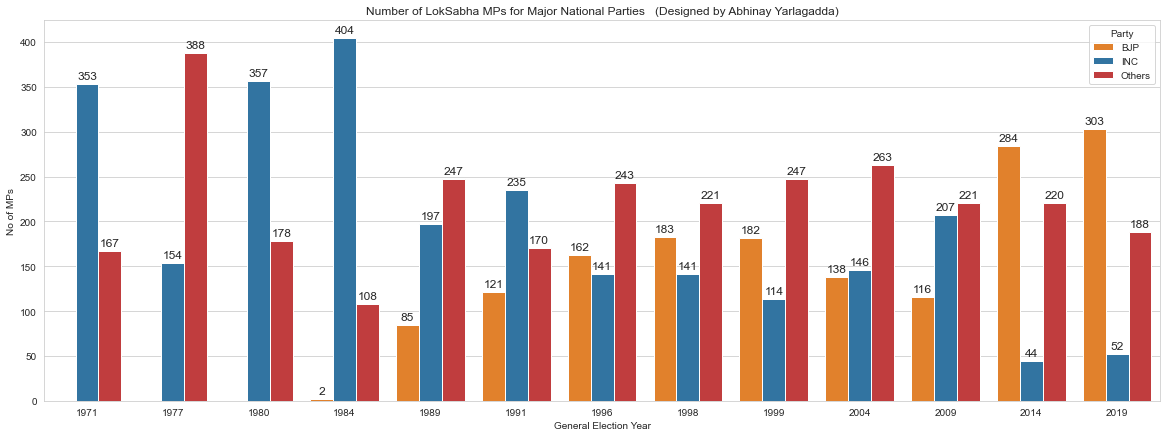

In [56]:
save = plt.figure(figsize=(20, 7))
sns.set_style("whitegrid")
plots3 = sns.barplot(data= fdata, x="Year", y="Wins", hue ="Party", palette=["C1", "C0","C3"])

for bar in plots3.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots3.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("General Election Year")
plt.ylabel("No of MPs")
plt.title("Number of LokSabha MPs for Major National Parties   (Designed by Abhinay Yarlagadda)")
save.savefig("LS MPs Total")

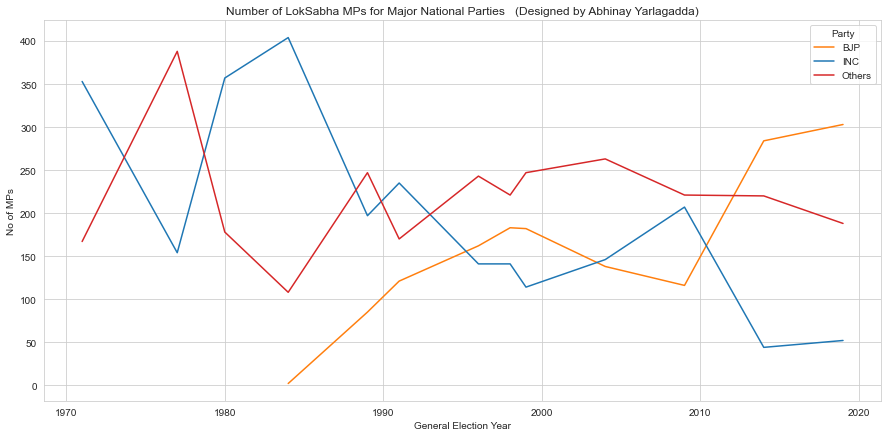

In [57]:
save = plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
sns.lineplot(data= fdata, x="Year", y="Wins", hue ="Party", palette=["C1", "C0","C3"])
plt.xlabel("General Election Year")
plt.ylabel("No of MPs")
plt.title("Number of LokSabha MPs for Major National Parties   (Designed by Abhinay Yarlagadda)")
save.savefig("India's political graph")

Text(0.5, 1.0, 'Number of Women LokSabha MPs   (Designed by Abhinay Yarlagadda)')

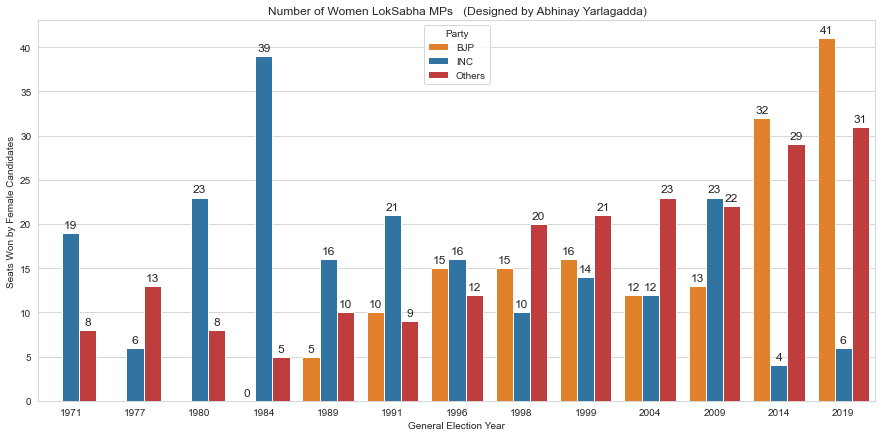

In [58]:
plt.figure(figsize=(15, 7))
sns.set_style("whitegrid")
plots4 = sns.barplot(data= fdata, x="Year", y="FWon", hue='Party', palette=["C1", "C0","C3"])
for bar in plots4.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots4.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("General Election Year")
plt.ylabel("Seats Won by Female Candidates")
plt.title("Number of Women LokSabha MPs   (Designed by Abhinay Yarlagadda)")

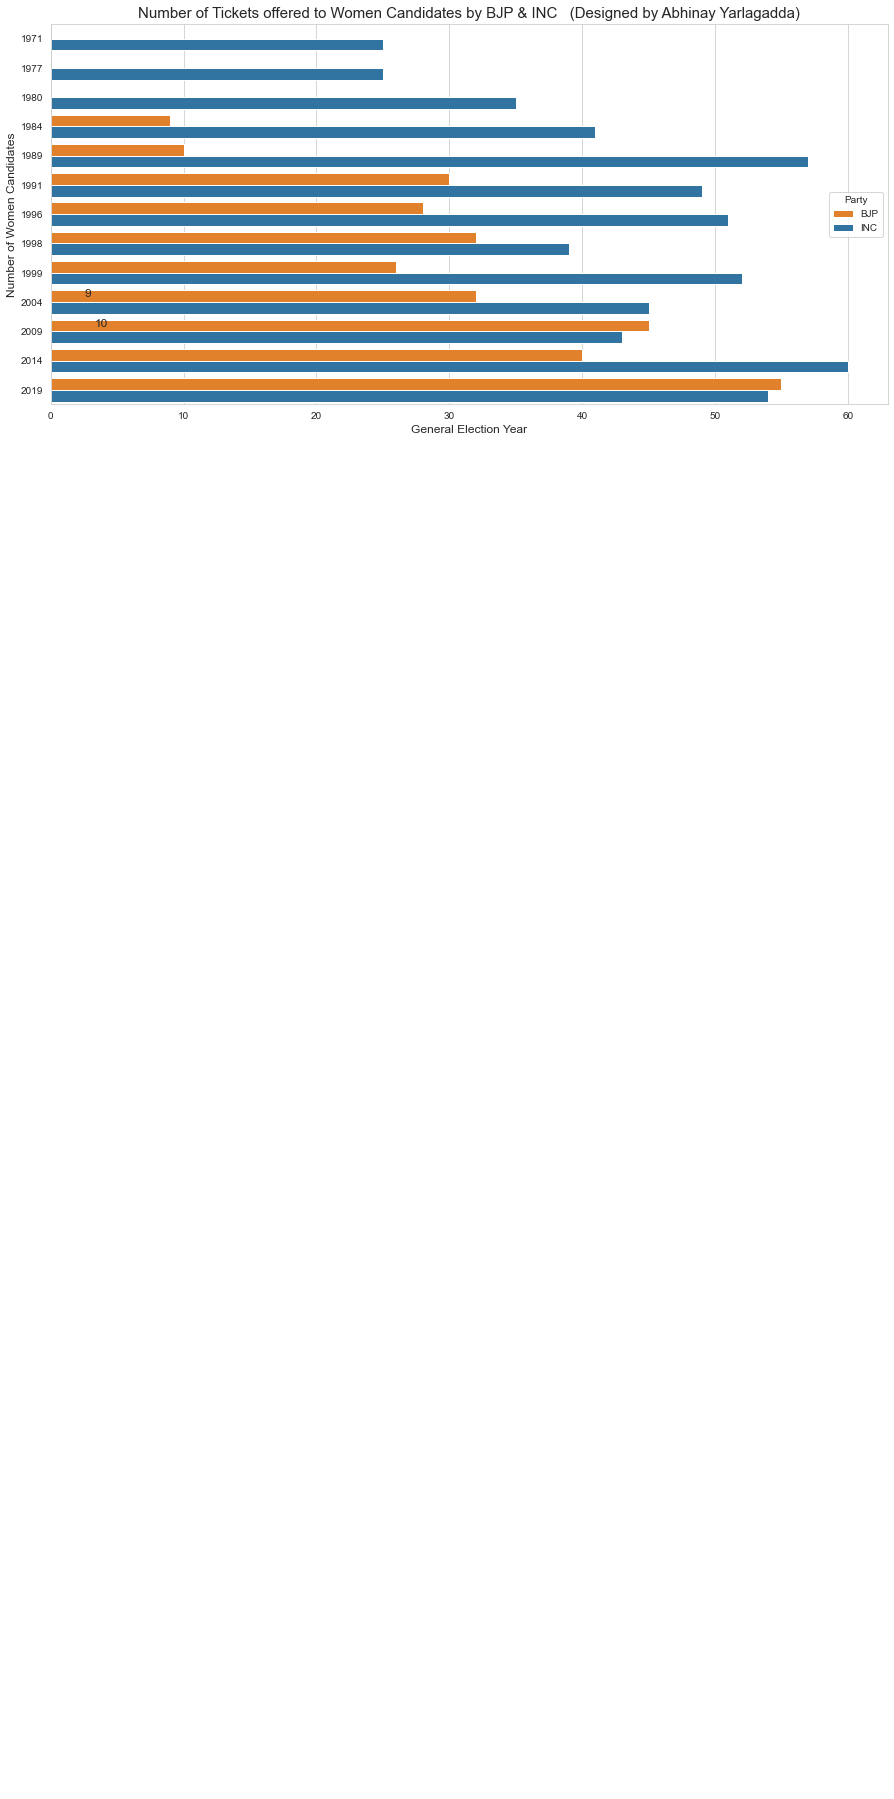

In [59]:
fbjpcong = fdata[fdata['Party'].isin(['BJP','INC', 'INC(I)'])]
sns.set_style("whitegrid")
save = plt.figure(figsize=(15, 7))
plots5 = sns.barplot(data= fbjpcong, y="Year", x="FContested", hue='Party', palette=["C1", "C0"], orient='h')
for bar in plots5.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots5.annotate(format(bar.get_width(), '.0f'), 
                   (bar.get_y() + bar.get_height() / 2, 
                    bar.get_width()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("General Election Year", size =12)
plt.ylabel("Number of Women Candidates", size=12)
plt.title("Number of Tickets offered to Women Candidates by BJP & INC   (Designed by Abhinay Yarlagadda)", size=15)
save.savefig("Women Contestants")

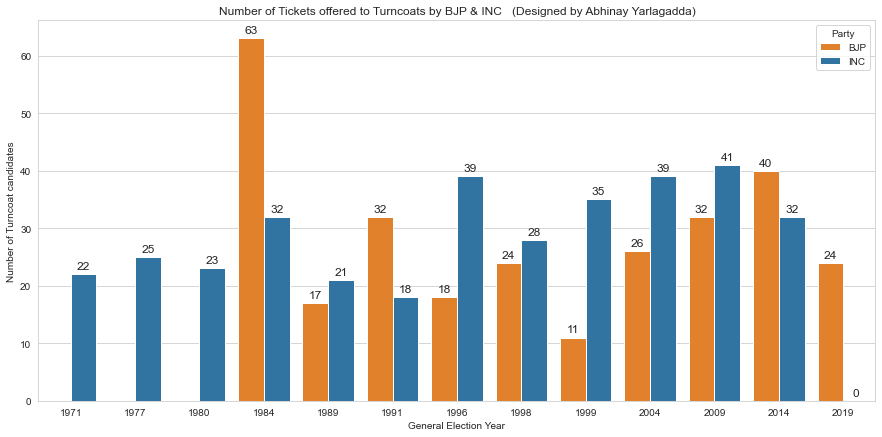

In [60]:
tcbjpcong = fdata[fdata['Party'].isin(['BJP','INC', 'INC(I)'])]
sns.set_style("whitegrid")
save = plt.figure(figsize=(15, 7))
plots5 = sns.barplot(data= tcbjpcong, x="Year", y="TurnCoat", hue='Party', palette=["C1", "C0"])
for bar in plots5.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots5.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("General Election Year")
plt.ylabel("Number of Turncoat candidates")
plt.title("Number of Tickets offered to Turncoats by BJP & INC   (Designed by Abhinay Yarlagadda)")
save.savefig("Turncoat Contestants")

In [61]:
#Binning according to Margin %
check1 = data[(data['Position']==1)&(data['Year']==2019)&(data['Party']=='BJP')]
margins = check1.Margin_Percentage

In [62]:
type(margins)

pandas.core.series.Series

In [63]:
mbins = pd.qcut(margins, 4)
bins = [0,5,10,15,20,25,30,35,40,45,50,55]
dicbins = { '(0,5]': '<5%', '(5, 10]': '<10%', '(45, 50]': '<50%'
    
            }
cats = pd.cut(margins, bins)
cats2 = pd.DataFrame(cats.values, columns =['Temp'])
cats2['bins'] = cats2.Temp.map(dicbins)

cats2

,Temp,bins
0,"(45, 50]",NaN
1,"(20, 25]",NaN
2,"(0, 5]",NaN
3,"(5, 10]",NaN
4,"(35, 40]",NaN
...,...,...
298,"(15, 20]",NaN
299,"(10, 15]",NaN
300,"(5, 10]",NaN
301,"(0, 5]",NaN


In [64]:
type(cats)

pandas.core.series.Series

In [65]:
cats.count()

303

In [66]:
cats

5948     (45, 50]
5956     (20, 25]
7269       (0, 5]
7284      (5, 10]
7298     (35, 40]
           ...   
91341    (15, 20]
91357    (10, 15]
91373     (5, 10]
91391      (0, 5]
91398    (15, 20]
Name: Margin_Percentage, Length: 303, dtype: category
Categories (11, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (35, 40] < (40, 45] < (45, 50] < (50, 55]]

In [67]:
vc.values

NameError: name 'vc' is not defined

In [ ]:
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
plots = sns.barplot(y=vc.values, x=vc.index)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

In [ ]:
mbins

In [ ]:
mbins.value_counts()

In [ ]:
margins.min()

In [ ]:
check2 = data[(data['Position']==1)&(data['Year']==2019)]
voteshare = check2.Vote_Share_Percentage
vbins = pd.qcut(voteshare, 5)

In [ ]:
vbins.value_counts().sort_index()

In [ ]:
voteshare.max()